# Linear Regression

In this notebook, we now use all features with the `LinearRegression` model.

We show what can go wrong if we simply use all available features and the `LinearRegression` model.

In [172]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# Prepare data

In [173]:
# Load the train data
train_data = pd.read_csv('../data/houses_train.csv', index_col=0)

In [174]:
# Split data into features and labels.
X_data = train_data.drop(columns='price')
y_data = train_data['price']

In [175]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define and train model

In [176]:
model = Pipeline([
    ('ohe', make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), ['zipcode', 'object_type_name']),
        ('drop', ['municipality_name']),
        remainder='passthrough', # sparse_threshold=0.0,
    )),
    ('reg', LinearRegression())
])

y_pred = cross_val_predict(model, X_data, y_data, cv=5)
print(mean_absolute_percentage_error(y_data, y_pred))

31.430796339116572


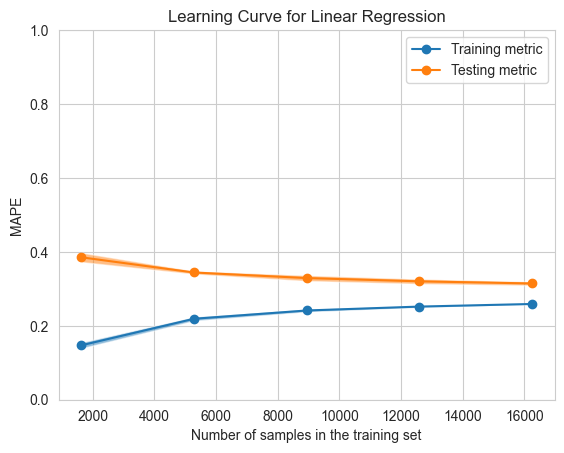

In [177]:
common_params = {
    "X": X_data,
    "y": y_data,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "MAPE",
}
lcd = LearningCurveDisplay.from_estimator(model, **common_params, scoring='neg_mean_absolute_percentage_error', negate_score=True)
lcd.ax_.set_ylim(ymin=0, ymax=1.0)
plt.title("Learning Curve for Linear Regression")
plt.show()

In [192]:
from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ('ohe', make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), ['zipcode', 'municipality_name', 'object_type_name']),
        remainder=StandardScaler(),
    )),
    ('reg', TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(),
        transformer=StandardScaler()
    ))
])

y_pred = cross_val_predict(model, X_data, y_data, cv=3)
print(mean_absolute_percentage_error(y_data, y_pred))

29.291817347230186


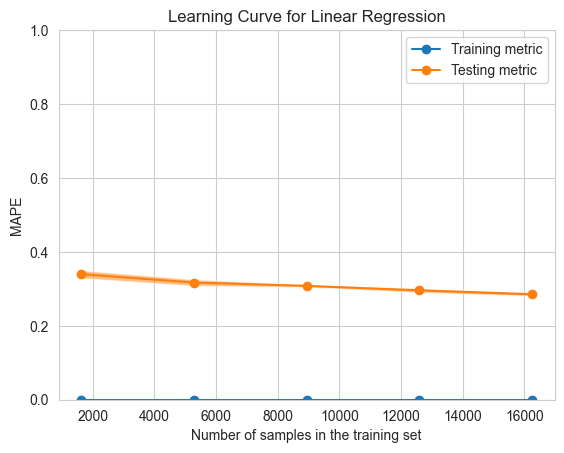

In [193]:
lcd = LearningCurveDisplay.from_estimator(model, **common_params, scoring='neg_mean_absolute_percentage_error', negate_score=True)
lcd.ax_.set_ylim(ymin=0, ymax=1.0)
plt.title("Learning Curve for Linear Regression")
plt.show()